In [1]:
from PIL import Image
from tensorflow.keras.models import load_model
import tensorflow as tf

In [4]:
model = load_model('/content/my_model20230609172115.h5')

In [17]:
!unzip /content/unseen_data

Archive:  /content/unseen_data.zip
   creating: unseen_data/cat/
  inflating: unseen_data/cat/6909.jpg  
  inflating: unseen_data/cat/6910.jpg  
  inflating: unseen_data/cat/6911.jpg  
  inflating: unseen_data/cat/6912.jpg  
  inflating: unseen_data/cat/6913.jpg  
  inflating: unseen_data/cat/6914.jpg  
  inflating: unseen_data/cat/6915.jpg  
  inflating: unseen_data/cat/6916.jpg  
  inflating: unseen_data/cat/6917.jpg  
  inflating: unseen_data/cat/6918.jpg  
  inflating: unseen_data/cat/6919.jpg  
  inflating: unseen_data/cat/6920.jpg  
  inflating: unseen_data/cat/6921.jpg  
  inflating: unseen_data/cat/6922.jpg  
  inflating: unseen_data/cat/6923.jpg  
  inflating: unseen_data/cat/6924.jpg  
  inflating: unseen_data/cat/6925.jpg  
  inflating: unseen_data/cat/6926.jpg  
  inflating: unseen_data/cat/6927.jpg  
  inflating: unseen_data/cat/6928.jpg  
  inflating: unseen_data/cat/6929.jpg  
  inflating: unseen_data/cat/6930.jpg  
  inflating: unseen_data/cat/6931.jpg  
  inflating: un

In [35]:
!unzip /content/Mydog

Archive:  /content/Mydog.zip
  inflating: Mydog/1.jpg             
  inflating: Mydog/2.jpg             
  inflating: Mydog/3.jpg             
  inflating: Mydog/4.jpg             
  inflating: Mydog/4584.jpg          
  inflating: Mydog/4585.jpg          
  inflating: Mydog/4586.jpg          
  inflating: Mydog/4587.jpg          
  inflating: Mydog/4588.jpg          
  inflating: Mydog/4589.jpg          
  inflating: Mydog/4590.jpg          
  inflating: Mydog/4591.jpg          
  inflating: Mydog/5488.jpg          
  inflating: Mydog/5489.jpg          
  inflating: Mydog/5490.jpg          
  inflating: Mydog/5491.jpg          
  inflating: Mydog/5492.jpg          
  inflating: Mydog/5493.jpg          
  inflating: Mydog/5494.jpg          
  inflating: Mydog/5495.jpg          
  inflating: Mydog/6.jpg             
  inflating: Mydog/7.JPG             
  inflating: Mydog/8.jpg             
  inflating: Mydog/human.JPG         
  inflating: Mydog/internet.JPG      
  inflating: Mydog/in

In [5]:
import tensorflow as tf

print(tf.__version__)
print(tf.keras.__version__)
from matplotlib import pyplot as plt
import os
import random
import matplotlib.pyplot as pltBVGGBHBNM
import os

import time
import PIL.Image as Image
from IPython.display import Image, display
import matplotlib.cm as cm
import numpy as np
from datetime import datetime
from datetime import datetime

2.12.0
2.12.0


In [18]:
from tensorflow.keras.models import load_model

In [37]:
INPUT_SIZE = 32
MAXPOOL_SIZE = 2
BATCH_SIZE = 32
IMAGE_SIZE = (192, 192)


validation_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/unseen_data/",
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=999,
    validation_split=0.40,
    subset="validation",
)

class_names = validation_dataset.class_names

Found 528 files belonging to 2 classes.
Using 211 files for validation.


In [38]:
import numpy as np

# Assuming you have a trained Keras model called 'model' and a dataset called 'dataset'

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the dataset and make predictions
for image_batch, label_batch in validation_dataset:
    # Make predictions on the image batch
    predictions = model.predict(image_batch)
    predicted_labels.extend(np.argmax(predictions, axis=1))

    # Store the true labels
    true_labels.extend(label_batch)

# Convert the lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

1/1 [==============================] - 0s 497ms/step


In [40]:
img = tf.keras.utils.load_img(
    "content/Mydog/1.jpg",
    target_size=(
        192,
        192,
    ),  # Image of my Dog, wich was wether in Test nor Validation dataset
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


prediction = model.predict_on_batch(img_array).flatten()

prediction = tf.where(prediction < 0.5, 0, 1)


print("This image most likely belongs to " + class_names[prediction[0]])

plt.imshow(img)

FileNotFoundError: ignored

7/7 [==============================] - 12s 2s/step


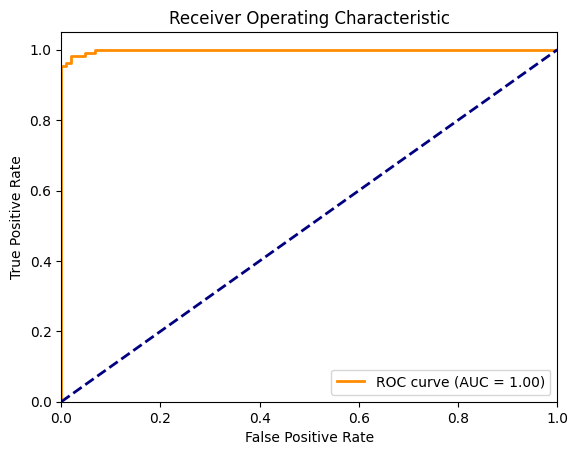

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Get the input data and labels from the test dataset
test_data, test_labels = [], []
for data, label in validation_dataset:
    test_data.append(data)
    test_labels.append(label)

test_data = np.concatenate(test_data, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

# Make predictions on the test data
predictions = model.predict(test_data).flatten()

# Compute the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, predictions)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

7/7 [==============================] - 9s 1s/step


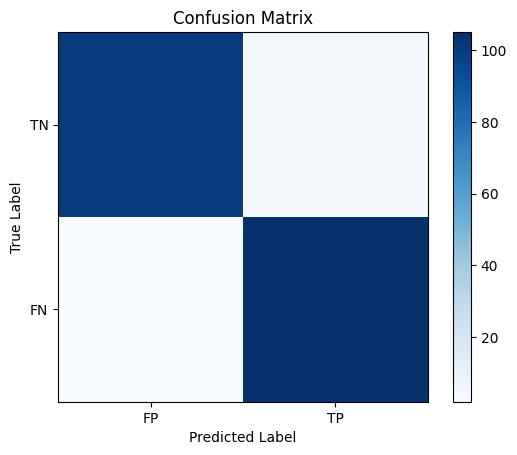

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have a trained Keras model called 'model' and a test dataset called 'validation_dataset'

# Get the input data and labels from the test dataset
test_data, test_labels = [], []
for data, label in validation_dataset:
    test_data.append(data)
    test_labels.append(label)

test_data = np.concatenate(test_data, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

# Make predictions on the test data
predictions = model.predict(test_data).flatten()
predicted_labels = np.where(predictions < 0.5, 0, 1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Display the confusion matrix
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["FP", "TP"])
plt.yticks(tick_marks, ["TN", "FN"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

7/7 [==============================] - 6s 779ms/step


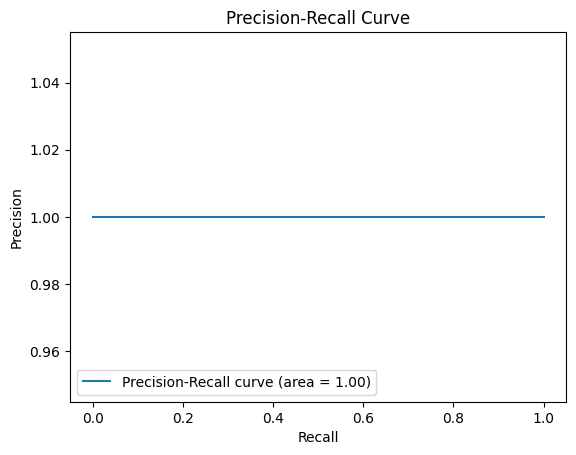

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Assuming you have a trained Keras model called 'model' and a test dataset called 'validation_dataset'

# Get the input data and labels from the test dataset
test_data, test_labels = [], []
for data, label in validation_dataset:
    test_data.append(data)
    test_labels.append(label)

test_data = np.concatenate(test_data, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

# Make predictions on the test data
predictions = model.predict(test_data).flatten()
positive_predictions = predictions[
    test_labels == 1
]  # Predicted probabilities for positive class
positive_labels = test_labels[test_labels == 1]  # True labels for positive class

# Compute precision and recall
precision, recall, _ = precision_recall_curve(positive_labels, positive_predictions)
area = auc(recall, precision)

# Plot precision-recall curve
plt.plot(recall, precision, label="Precision-Recall curve (area = %0.2f)" % area)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import precision_score

# Assuming you have a trained Keras model called 'model' and a test dataset called 'test_dataset'

# Get the true labels from the test dataset
image_batch, label_batch = validation_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

predictions = tf.where(predictions < 0.5, 0, 1)

print("Predictions:\n", predictions.numpy())
print("Labels:\n", label_batch)

# Calculate precision
precision = precision_score(label_batch, predictions.numpy())

print("Precision: {:.4f}".format(precision))

Predictions:
 [0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1]
Labels:
 [0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1]
Precision: 1.0000


In [44]:
accuracy = model.evaluate(validation_dataset)
print("Accuracy: {:.2f}%".format(accuracy[1] * 100))

7/7 [==============================] - 9s 867ms/step - loss: 0.0717 - accuracy: 0.9716
Accuracy: 97.16%
